In [16]:
from pymongo import MongoClient
import pprint
import json
import matplotlib.pyplot as plt

latitude = []
longitude = []

client = MongoClient('120.126.136.17',27017)
db = client['Tracker']
collection_leo = db['leo']
collection_james = db['james']
collection_dn2 = db['dn2']
collection_db2 = db['db2']
 
cursor_james = collection_james.find({})
cursor_leo = collection_leo.find({})
cursor_dn2 = collection_dn2.find({})
cursor_db2 = collection_db2.find({})

jsonData_james = [d for d in cursor_james]
jsonData_leo = [d for d in cursor_leo]
jsonData_dn2 = [d for d in cursor_dn2]
jsonData_db2 = [d for d in cursor_db2]

In [17]:
# for x in jsonData_james:
#     latitude.append(float(x['latitude']))
#     longitude.append(float(x['longitude']))
# for x in jsonData_leo:
#     latitude.append(float(x['latitude']))
#     longitude.append(float(x['longitude']))
# for x in jsonData_dn2:
#     latitude.append(float(x['latitude']))
#     longitude.append(float(x['longitude']))
for x in jsonData_db2:
    latitude.append(float(x['latitude']))
    longitude.append(float(x['longitude']))

In [18]:
import urllib.request, json 
with urllib.request.urlopen("https://sheethub.com/ronnywang/%E9%84%89%E9%8E%AE%E5%B8%82%E5%8D%80%E8%A1%8C%E6%94%BF%E5%8D%80%E5%9F%9F%E7%95%8C%E7%B7%9A/uri/19260593?format=geojson") as url:
    data = json.loads(url.read().decode())

In [19]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.path as mplPath

# from scipy.spatial import ConvexHull
boarderData = data['features'][0]['geometry']['coordinates'][0]

#draw the place
trainingset = np.array(boarderData)
# plt.plot(trainingset[:,0], trainingset[:,1], 'o')

#make out a path
borderPath = mplPath.Path(boarderData)

location = []
for x in range(len(latitude)):
    if borderPath.contains_points(np.array([[longitude[x], latitude[x]]])):       
        location.append([longitude[x], latitude[x]])
    
# plt.show()

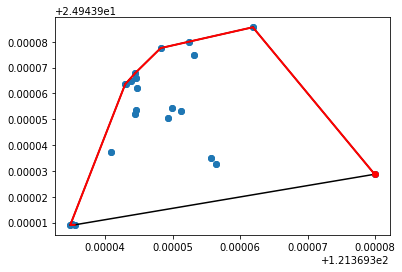

In [5]:
from scipy.spatial import ConvexHull

trainingset = np.array(location)
plt.plot(trainingset[:,0], trainingset[:,1], 'o')

hull = ConvexHull(trainingset)
for simplex in hull.simplices:
    plt.plot(trainingset[simplex,0], trainingset[simplex, 1], 'k-')
    
plt.plot(trainingset[hull.vertices,0], trainingset[hull.vertices,1], 'r-', lw=2)
plt.plot(trainingset[hull.vertices[0],0], trainingset[hull.vertices[0],1], 'ro')
plt.show()

In [12]:
import random

len(location)
trainingplane1 = []
trainingplane2 = []
for x in location:
    if (random.randint(1,100) <= 50):
        trainingplane1.append(x)
    if (random.randint(1,100) <= 50):
        trainingplane2.append(x)

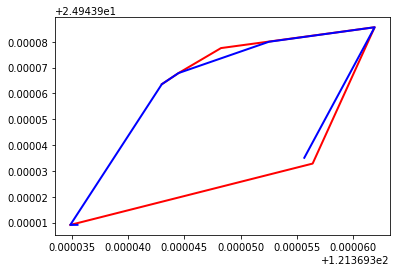

In [13]:
trainingset1 = np.array(trainingplane1)
trainingset2 = np.array(trainingplane2)

hull1 = ConvexHull(np.array(trainingset1))
hull2 = ConvexHull(np.array(trainingset2))

plt.plot(trainingset1[hull1.vertices,0], trainingset1[hull1.vertices,1], 'r-', lw=2)
plt.plot(trainingset2[hull2.vertices,0], trainingset2[hull2.vertices,1], 'b-', lw=2)

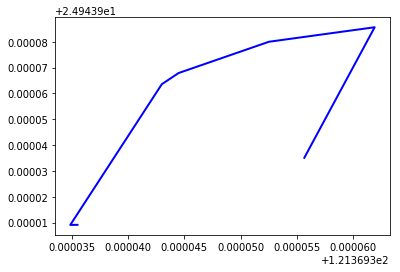

In [14]:
plt.plot(trainingset2[hull2.vertices,0], trainingset2[hull2.vertices,1], 'b-', lw=2)

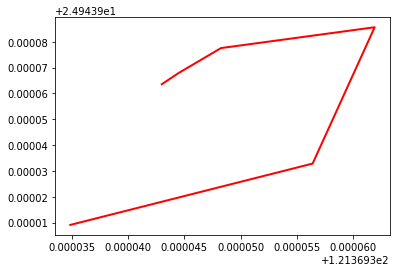

In [15]:
plt.plot(trainingset1[hull1.vertices,0], trainingset1[hull1.vertices,1], 'r-', lw=2)